In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, make_blobs, make_moons
from sklearn.model_selection import train_test_split

# Classificadores
from sklearn.linear_model import Perceptron

# Biblioteca para criar classificador.
from sklearn.base import BaseEstimator, ClassifierMixin

# Biblioteca para visualização.
from mlxtend.plotting import plot_decision_regions

## Duas Luas

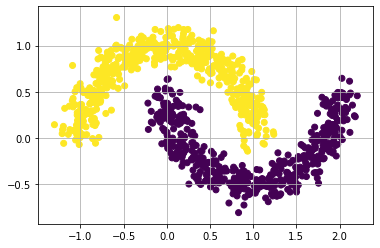

In [51]:
X, y = make_moons(n_samples=1000, noise=.1, random_state=1)
y = 1-y
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)

## Make Blobs

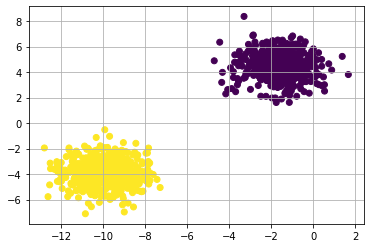

In [23]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)
# y = 1-y
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)

In [47]:
X, y = load_breast_cancer(return_X_y = True)
y = 1-y

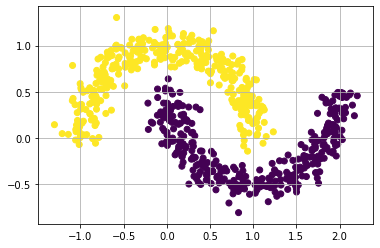

In [52]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(Xtr[:,0],Xtr[:,1],c=ytr)
plt.grid(True)

In [10]:
K, N = Xtr.shape
K, N

(670, 2)

In [13]:
class SLMP(BaseEstimator, ClassifierMixin):
    
    def __init__(self, verbose = False, myInf = 1.e+10):
        self.verbose = verbose
        self.myInf = 1.e+10 
        
    def fit(self, Xtr, ytr):
        
        K, N = Xtr.shape
        self.w_ = -np.max(Xtr[ytr==0,:],axis=0)
        
# #         Inicializando os pesos como "infinito"
#         self.w_ = (self.myInf)*np.ones(2,)
#         if self.verbose:
#             print("Pesos iniciais:",self.w_)
        
#         for xi in range(K):
#             compara = ((Xtr[xi,:] + self.w_)>0) > ytr[xi]
#             self.w_[compara] = -Xtr[xi,compara]
#             if self.verbose:
#                 print("Pesos para atualizar:",compara)
#                 print("Pesos atualizados:",self.w_)       
        return self
    
    def decision_function(self,X):
        return np.max(X+self.w_,axis=1)
    
    def predict(self,X):
        return self.decision_function(X)>0

In [38]:
class SLMPbox(BaseEstimator, ClassifierMixin):
    
    def __init__(self, verbose = False, myInf = 1.e+10):
        self.verbose = verbose
        self.myInf = 1.e+10 
        
    def fit(self, Xtr, ytr):
        
        Xtr = np.hstack([Xtr,-Xtr])
        
        K, N = Xtr.shape
        self.w_ = -np.max(Xtr[ytr==0,:],axis=0)
        
# #         Inicializando os pesos como "infinito"
#         self.w_ = (self.myInf)*np.ones(2,)
#         if self.verbose:
#             print("Pesos iniciais:",self.w_)
        
#         for xi in range(K):
#             compara = ((Xtr[xi,:] + self.w_)>0) > ytr[xi]
#             self.w_[compara] = -Xtr[xi,compara]
#             if self.verbose:
#                 print("Pesos para atualizar:",compara)
#                 print("Pesos atualizados:",self.w_)       
        return self
    
    def decision_function(self,X):
        X = np.hstack([X,-X])
        return np.max(X+self.w_,axis=1)
    
    def predict(self,X):
        return self.decision_function(X)>0

Acuracias:
 Treino: 0.8761194029850746 
  Teste: 0.9151515151515152


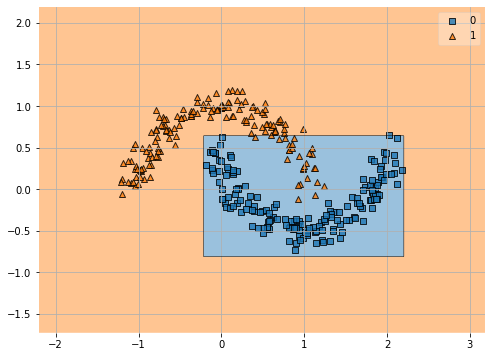

In [55]:
clf = SLMP()
clf.fit(Xtr,ytr)

plt.figure(figsize=(8,6))
plot_decision_regions(Xte,yte,clf=clf)
plt.grid(True)

print("Acuracias:\n Treino:", clf.score(Xtr,ytr),"\n  Teste:", clf.score(Xte,yte))

Acuracias:
 Treino: 0.8761194029850746 
  Teste: 0.9151515151515152


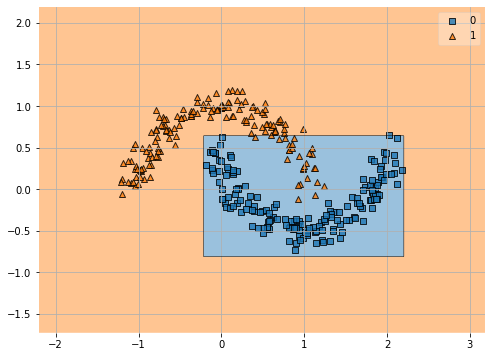

In [56]:
clf = SLMPbox()
clf.fit(Xtr,ytr)

plt.figure(figsize=(8,6))
plot_decision_regions(Xte,yte,clf=clf)
plt.grid(True)

print("Acuracias:\n Treino:", clf.score(Xtr,ytr),"\n  Teste:", clf.score(Xte,yte))

In [11]:
clf = SLMP()
clf.fit(Xtr,ytr)

plt.figure(figsize=(8,6))
for xi in range(Xtr.shape[0]):
    
    
    plot_decision_regions(Xte,yte,clf=clf)
    plt.grid(True)
    print("Acuracias:\n Treino:", clf.score(Xtr,ytr),"\n  Teste:", clf.score(Xte,yte))

array([1.23343174, 1.30429974])

Acuracias:
 Treino: 0.8432835820895522 
  Teste: 0.8848484848484849


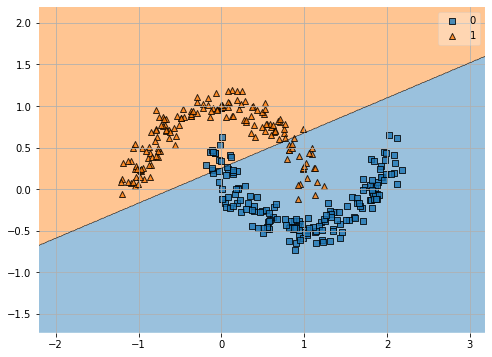

In [137]:
clf = Perceptron()
clf.fit(Xtr,ytr)

plt.figure(figsize=(8,6))
plot_decision_regions(Xte,yte,clf=clf)
plt.grid(True)

print("Acuracias:\n Treino:", clf.score(Xtr,ytr),"\n  Teste:", clf.score(Xte,yte))

In [93]:
np.max(Xtr+clf.w_,axis=1)

array([-11.23963612,  -2.47491811,  -2.81964917,  -3.32840703,
        -3.87683489,  -2.2661481 , -10.85331805,  -2.21884202,
       -10.93161553, -10.84604481, -10.98329979, -12.10210816,
       -10.55968177, -12.25973569, -12.46377294,  -2.35453951,
       -11.07261284,  -2.59552824, -12.01641888,  -3.03798759,
        -5.0757134 ,  -9.61955909, -12.08861733,  -9.49114133,
        -3.43706394, -10.99802321,  -3.20974149, -11.68916723,
        -3.42753888,  -2.7122951 ,  -3.46043056,  -2.74811603,
       -11.54632144,  -4.02822724,   0.        ,  -2.12216088,
        -2.87086101, -11.93408177,  -1.26990531,  -2.50673563,
       -11.32770462,  -2.84046931,  -2.50503507, -10.49362233,
       -12.10670463, -10.01063728,  -2.5096133 , -11.76061214,
        -2.87971431,  -9.09377857,  -2.14607489,  -1.90224718,
        -2.73103929,  -2.33575362,  -3.36025701,  -3.37197951,
        -2.69999606,  -5.73458176, -11.24835842, -11.32974139,
        -3.29921592,  -2.80331482,  -3.27886501, -10.27

### Rascunho

In [73]:
xi=7
# Xtr[xi,:], Xtr[xi,:]+w, 
print(w)
compara = ((Xtr[xi,:] + w)>0) > ytr[xi]
print(compara)
w[compara] = -Xtr[xi,compara]
print(w)

[ 0.81339926 -6.09894447]
[ True False]
[ 0.55732317 -6.09894447]


In [17]:
np.hstack([Xtr,-Xtr])

array([[ 0.3650656 , -0.48225988, -0.3650656 ,  0.48225988],
       [ 0.9326602 ,  0.54128434, -0.9326602 , -0.54128434],
       [ 0.56930206, -0.5642845 , -0.56930206,  0.5642845 ],
       ...,
       [-0.21353324,  0.09066302,  0.21353324, -0.09066302],
       [ 2.2054586 ,  0.45612196, -2.2054586 , -0.45612196],
       [ 1.979767  , -0.07001702, -1.979767  ,  0.07001702]])

## Ideias para interpretação geométrica do SLMP

Entrada da rede: x

Saída (classe 0/1): 

$$y = f \left(\max_{i=1:N} \{w_i+x_i\} \right) = f \left(\bigvee_{i=1}^N \{w_i+x_i\} \right),$$
em que $f(t) = 1$ se $t>0$ e $f(t)=0$ caso contrário.

Devemos determinar quando $y=0$, ou seja, $$\max_{i=1:N} \{w_i+x_i\} \leq 0.$$
Equivalentemente, $$ x_i \leq -w_i, \quad i=1,\ldots,N.$$

## Tarefa: Desenvolver a interpretação geométrica do SLMP-box;